### Importing necessary packages

In [1]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing boston pricing dataset
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The dataset contains 506 observations, 13 features and 1 target variable. Description is given below -

| Column Name | Description                                                  |
| ----------- | ------------------------------------------------------------ |
| CRIM        | per capita crime rate by town                                |
| ZN          | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS       | proportion of non-retail business acres per town             |
| CHAS        | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX         | nitric oxides concentration (parts per 10 million)           |
| RM          | average number of rooms per dwelling                         |
| AGE         | proportion of owner-occupied units built prior to 1940       |
| DIS         | weighted distances to five Boston employment centres         |
| RAD         | index of accessibility to radial highways                    |
| TAX         | full-value property-tax rate per $10,000                     |
| PTRATIO     | pupil-teacher ratio by town                                  |
| B           | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT       | % lower status of the population                             |
| MEDV        | Median value of owner-occupied homes in dollor 1000          |

### Importing boston pricing dataset

In [2]:
boston = load_boston()

X = boston['data']
y = boston['target']
names = boston['feature_names']

### Exploratory Data Analysis (EDA)

In [3]:
df = pd.DataFrame(X, columns=names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Missing value analysis

In [4]:
print('Total missing data point in the data:', np.isnan(X).sum())

Total missing data point in the data: 0


### Histograms
Histograms can be used to visualize the distribution of the individual variables.

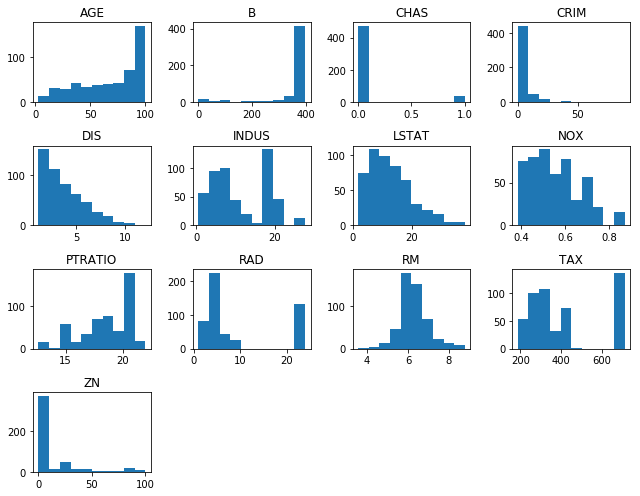

In [5]:
df.hist(bins=10,figsize=(9,7),grid=False)
plt.tight_layout()

As you can see, most of features are not following the normal distribution and are skewed.

### Boxplots
Boxplots are also useful in visualizing distribution of data. Information of existing outliers in the data can also be visualized through the boxplots.

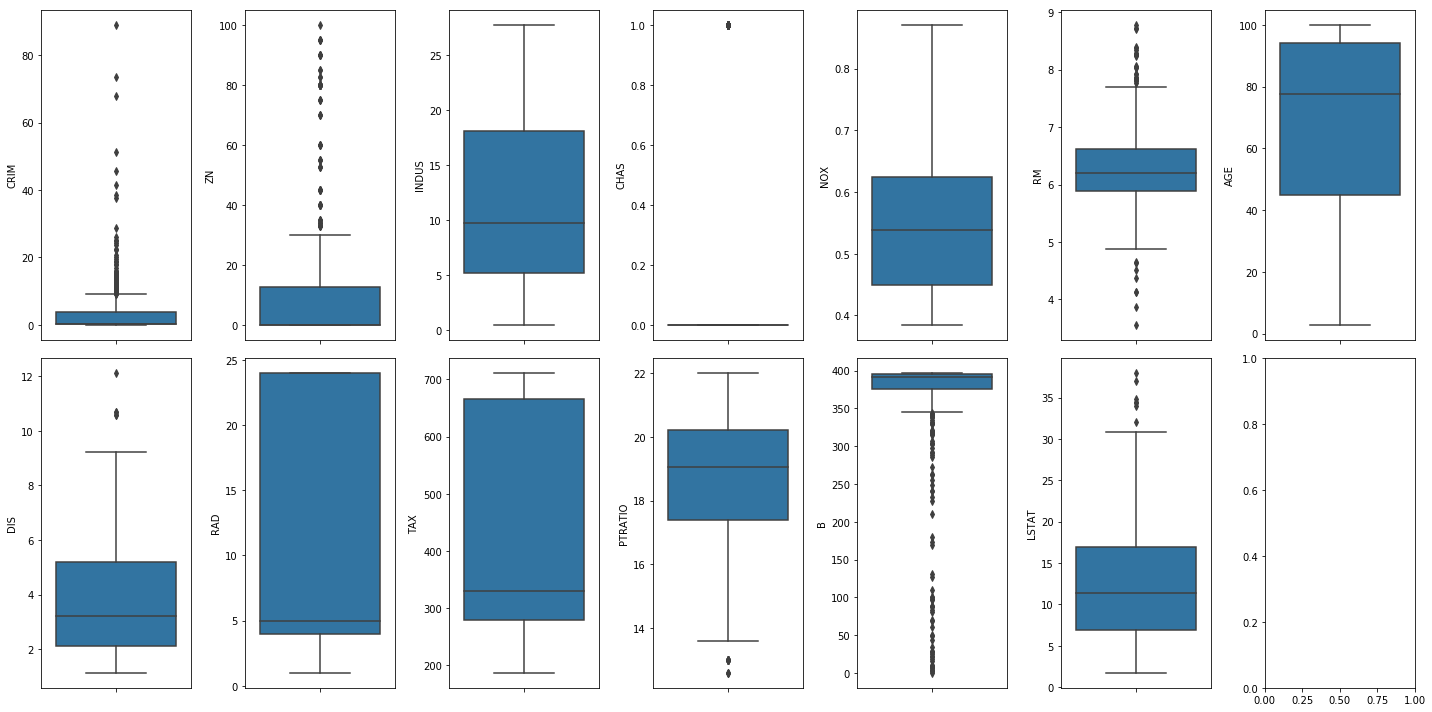

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols=7, figsize = (20,10))
index = 0
axs = ax.flatten()
for i, j in df.items():
    sns.boxplot(y = i, data = df, ax = axs[index])
    index += 1 

plt.tight_layout()

Most of the features contain the outliers.

### Target distribution

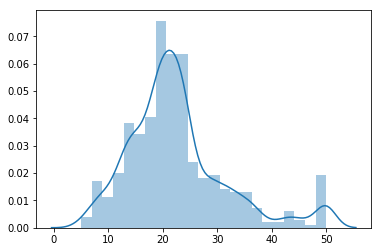

In [7]:
sns.distplot(y);

Distribution of target variable is close to the normal distribution.

### Standardizing the independent variables
As the dataset features have different units, it is recommended to normalize/standardize the dataset. 

In [9]:
std_X = (X - X.mean(axis = 0))/X.std(axis = 0)
std_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [10]:
std_X.shape

(506, 13)

### Correlation Matrix

In [8]:
corr = np.corrcoef(std_X.T)
corr.shape

NameError: name 'std_X' is not defined

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin=-0.8, vmax=0.8, center=0,
                 cmap='YlGnBu', linecolor="white", linewidths=0.01,
                 square=True, annot=True, fmt='.1g',
                )

ax.set_xticklabels(names, rotation=45, horizontalalignment='right')
ax.set_yticklabels(names, rotation=0, horizontalalignment='right')
plt.title('Correlation between features', fontdict = {'fontsize':20});

### Implemention of PCA
PCA can be implemented in the following steps - 
1. Compute the d-dimensional mean vector where d in the number of features in the datadet.
2. Compute the covariance matrix of the dataset.
3. Compute eigenvectors and corresponding eigenvalues.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalue to form a d x k dimensional matrix W.
5. Use this d x k eigenvector matrix to transform the samples onto the new subspace.

### 1. Computing the column (dimensions) mean and standard deviations

In [ ]:
# Compute the d-dimensional mean vector
col_mean = np.mean(X, axis = 0)
col_stdev = np.std(X, axis = 0)

print('-'*60)
print('Mean across columns:\n', col_mean)
print('-'*60)
print('Standard deviation across columns:\n', col_stdev)

### 2. Computing the `Covariance matrix`
Covariance matrix can be calculated using the formula - 
![Imgur](https://i.imgur.com/Rv4d85j.jpg)


In [ ]:
mean_vec = np.mean(std_X, axis=0)
cov_mat = (std_X - mean_vec).T.dot((std_X - mean_vec)) / (std_X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
cov_mat.shape

In [ ]:
# cov_mat = np.cov(std_X.T)
# cov_mat.shape

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(cov_mat, linecolor="white", linewidths=0.01,
                    square=True, annot=True, fmt='.1g',
                   )

ax.set_xticklabels(names, rotation=45, horizontalalignment='right')
ax.set_yticklabels(names, rotation=0, horizontalalignment='right')
plt.title('Correlation between features', fontdict = {'fontsize':20});

### 3. Computing eigenvectors and eigenvalues of covariance matrix
Covariance matrix is a symmetic matrix, so as per linear algebra its eigenvectors will be real and orthogonal to each other.

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

### 4.a Sorting the eigenvectors into decreasing order
eigenvectors have unit length so they cannot be sorted directly. They can only be sorted through their corresponding eigenvalues.

In [ ]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# sorting the eigen 
eig_pairs.sort(key = lambda x: x[0], reverse = True)

In [ ]:
print('eigen values in sorted order:')
for val in eig_pairs:
    print(val[0])

### 4.b Choosing k eigenvectors with the largest eigenvalues
Here we have to select two principal components. 

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1), eig_pairs[1][1].reshape(13,1)))
print('Matrix w:\n', matrix_w)

In [ ]:
matrix_w.shape

In [ ]:
std_X.shape

### 5. Transforming samples onto new subspace

In [ ]:
transformed = matrix_w.T.dot(std_X.T)
transformed.shape

In [ ]:
transformed.T

### PCA using sklearn library

In [ ]:
pca = PCA(n_components=13)
pca.fit(std_X)
pca_samples = pca.transform(std_X)

In [ ]:
pca_samples.shape

In [ ]:
pca_samples

Multiplying the array with -1 to get the same value

In [ ]:
pca_samples = (-1)*pca_samples
pca_samples

### Scree Plot
Scree plot is a plot to visualize the cumulative percentage variance explained by the principal components.

In [ ]:
fig, ax = plt.subplots(figsize = (14,5))
sns.set(font_scale = 1)
plt.step(range(pca_samples_mirror.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', 
         label = 'cumulative explained variance')
sns.barplot(np.arange(1, pca_samples_mirror.shape[1]+1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
           label = 'individual explained variance')
plt.xlim(0,13)

ax.set_xticklabels([s if int (s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained Variance', fontsize = 14)
plt.xlabel('Principle Components', fontsize = 14)
plt.legend(loc = "upper left", fontsize = 13)

Two principal components cumulatively explaining approx. 60% variance of the target variable.

### Creating a dataframe using principal components

In [ ]:
principaldf = pd.DataFrame(pca_samples[:,0:2], columns = ['principal component 1', 'principal component 2'])
principaldf.head()

In [ ]:
y_df = pd.DataFrame(y, columns=['Price'])
y_df.head()

In [ ]:
y_df.describe().T

In [ ]:
# Binning the target variable
y_df['Price_range'] = ''

y_df.loc[y_df['Price'] <= 17.025, 'Price_range'] = 'low'
y_df.loc[(y_df['Price'] > 17.025) & (y_df['Price'] <= 25.0), 'Price_range'] = 'medium'
y_df.loc[y_df['Price'] > 25.0, 'Price_range'] = 'high'

y_df.sample(5)

In [ ]:
finaldf = pd.concat([principaldf, y_df['Price_range']], axis =1)
finaldf.head()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Price_range'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Conclusion
PCA can be used as an effective tool for dimensionality reduction. As the results are showing that we can able to explain upto 90% of variance just using 8 features out of 13 features.

One of the drawback of the technique is that it makes independent variable less interpretable.